# **Introduction to Plotting in Matplotlib**

Matplotlib offers three similar methods for presenting images in a notebook, with the choice among them typically based on personal preferences and comfort level. These three methods are:

- subplots() 
- subplot() 
- add_subplot() 

Moreover, we will make use of the `pyplot` package from Matplotlib, often abbreivated as `plt`. This is achieved through either one of the following:

- import matplotlib.pyplot as plt
- from matplotlib import pyplot as plt

In [1]:
import matplotlib.pyplot as plt

The `plt` module facilitates the incorporation of an image into our program using the `imread()` method. This method, given the image path, yields a NumPy array. Thereafter, we can employ the `imshow()` method to present the image.

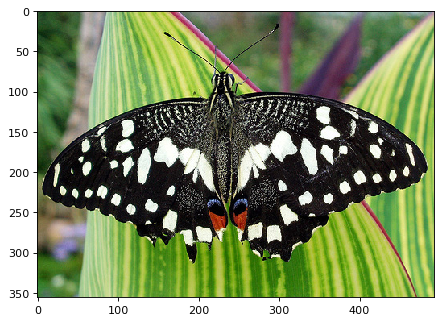

In [2]:
img = plt.imread('data/images/butterfly.jpg')
plt.imshow(img); # The ';' will suppress any textual information returned by the function call

In the first line of code, the image is read using `plt.imread('data/images/butterfly.jpg')`, and the result is stored in the variable `img`, which becomes a NumPy array representing the image. To confirm the contents of this array, you can print it separately using `print(img)`.

The second line utilizes the `imshow()` method from Matplotlib to plot and display the image in RGB format. This two-step process allows you to both retrieve the image as a NumPy array and visualize it using Matplotlib.

## **General Information about Plotting in Matplotlib**

Before delving into the details of the three aforementioned methods, let's take a moment to explore some key terms in Matplotlib. These are **figures**, **axes**, and **plots**. Understanding these terms is essential for effectively using the library to generate and customize various types of plots and figures.

A **Figure** is a top-level container that holds all the elements of a plot of set of subplots. It can be though of as the entire canvas upon which an artist may draw a single image (plot) or multiple images (subplots)

An **Axis (Plural Axes)** is a region of the figure that displays the data. It is what you typically think of as a 'plot.'
A figure can contain one or more axes. So, for example, if you wanted to display a sine wave on one side and a cosine wave on the other side, you would have a single figure with two axes.

A **Plot** is representation of data on an axis. For example, if you wanted to display a sine wave and consine wave on the same graph, you would have a single figure with a single axis but two plots.

If the terms still seem ambiguous to you, that's fine. It will become better once we move on to actual implementation. Before we do so, let us read in a few images that we will be working with for the remainder of this notebook.

In [27]:
img_butterfly = plt.imread('data/images/butterfly.jpg')
img_parrots = plt.imread('data/images/parrots.jpg')
img_motorbike = plt.imread('data/images/motorbike.jpeg')
img_trees = plt.imread('data/images/trees.jpg')

> TIP: Use `TAB` to autocomplete keywords, file paths, function names, variables etc.

## **Technique 1 (`subplots()` Method)**

The `subplots()` method in Matplotlib is used to create a set of subplots within a single figure. This method returns both the figure and an array of axes, allowing you to plot multiple subplots in a grid-like structure. It is used in the following fashion:

`fig, axes = plt.imshow(nrows, ncols)`

- nrows: The number of rows in the grid
- ncols: The number of cols in the grid
- fig: The figure object
- axes: A matrix of subplots

For example, let us try creating a 2x2 grid of subplots 

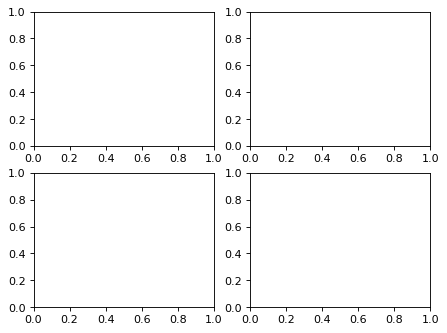

In [28]:
fig, axes = plt.subplots(nrows = 2, ncols = 2) # --> fig, axes = plt.subplot(2, 2)

- The plot on the top left is the first plot and is indexed using axes[0,0]
- The plot on the top right is the second plot and is indexed using axes[0, 1]
- The plot on the bottom left is the third plot and is indexed using axes[1, 0]
- The plot on the bottom left is the fourth plot and is indexed using axes[1, 1]

Experimenting with the `nrows` and `ncols` parameters allows you to generate the desired number of subplots in a particular fashion. However, challenges may arise concerning the spacing between subplots and the size of each individual subplot. 

To resolve the spacing issue, you can employ the `plt.tight_layout()` method. This function optimally adjusts the layout to enhance the arrangement of the subplots.

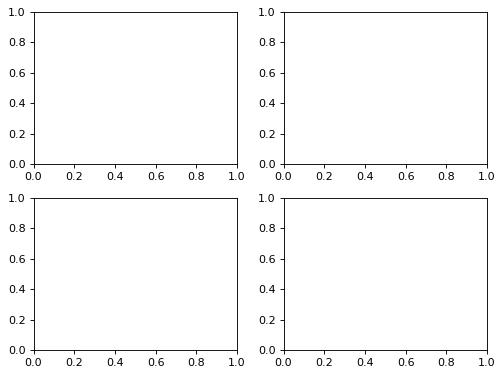

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2) # --> fig, axes = plt.subplot(2, 2)
plt.tight_layout()

As for the size of the canvas (and therefore the size of each individual plot on the canvas), we introduce an additional parameter, `figsize`, in the `subplots()` method. This parameter allows you to control the overall size of the figure, ensuring each subplot is appropriately sized within the layout.

`fig, axes = plt.imshow(nrows = , ncols = , figsize = (w, h))`
- where w and h represent the width and heigh of the canvas in inches

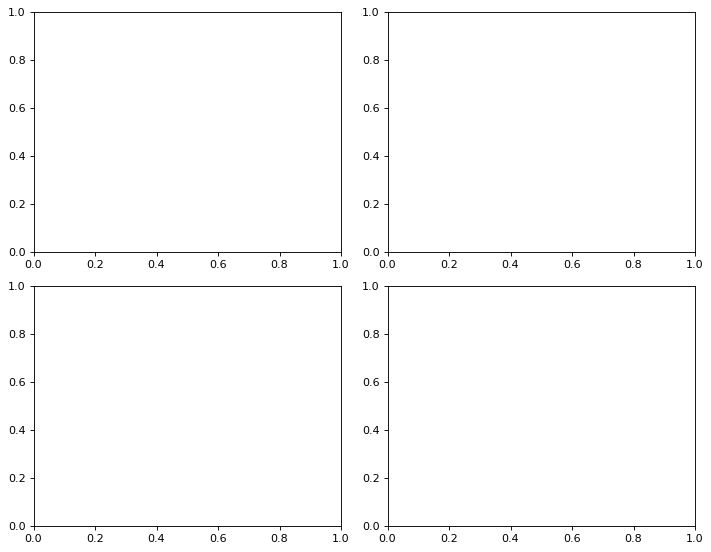

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 7)) # Usually, we'll play around with 'w' and 'h' until we get something we're satisfied with
plt.tight_layout()

Finally, to plot our images, one for each subplot, the process involves selecting the specific axis of interest and then using the `imshow()` method to display the image on that particular subplot. **The `subplots()` method and actually displaying the image through `imshow()` must appear in the same code cell.**

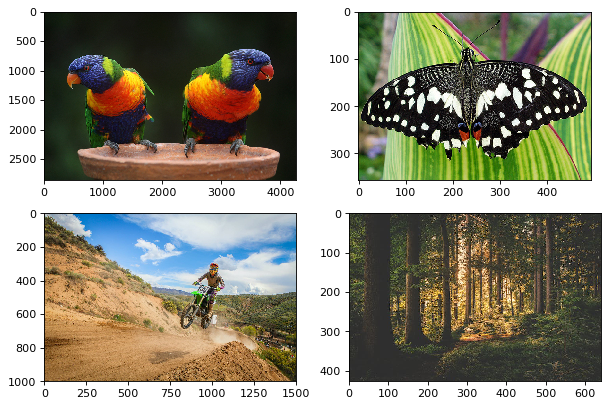

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 6))

axes[0 , 0].imshow(img_parrots) # We first select the subplot (axes[0, 0]) and then invoke the imshow method to display the image on that subplot.
axes[0 , 1].imshow(img_butterfly)
axes[1 , 0].imshow(img_motorbike)
axes[1 , 1].imshow(img_trees);

Finally, we can customize the subplots as needed by setting titles, labels, and other properties indivdually. Again, we must first select the subplot of interest before applying any changes.

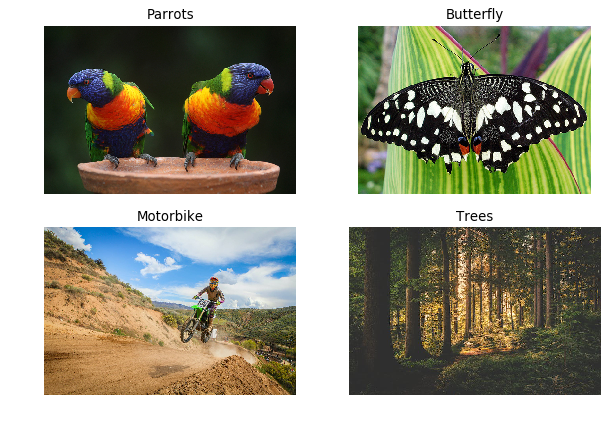

In [60]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 6))

axes[0 , 0].imshow(img_parrots)
axes[0 , 0].set_title("Parrots")  # sets the title of the indexed subplot
axes[0 , 0].axis('off')           # turns off the axis of the indexed subplot
    
axes[0 , 1].imshow(img_butterfly)
axes[0 , 1].set_title("Butterfly")
axes[0 , 1].axis('off')  

axes[1 , 0].imshow(img_motorbike)
axes[1 , 0].set_title("Motorbike")
axes[1 , 0].axis('off')  


axes[1 , 1].imshow(img_trees)
axes[1 , 1].set_title("Trees")
axes[1 , 1].axis('off');

On a last note, if indexing each subplot individually feels cumbersome, you have the option to streamline the process by tuple unpacking the indexes in conjunction with the `subplots()` method call. Note that the subplots along a row are unpacked together so they must be in the same tuple. Subplots along the columns are separated into different tuples. If you don't unpack properly, you will get an error. For example:

- `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))`
- `fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)`
- `fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)`

To demonstrate:

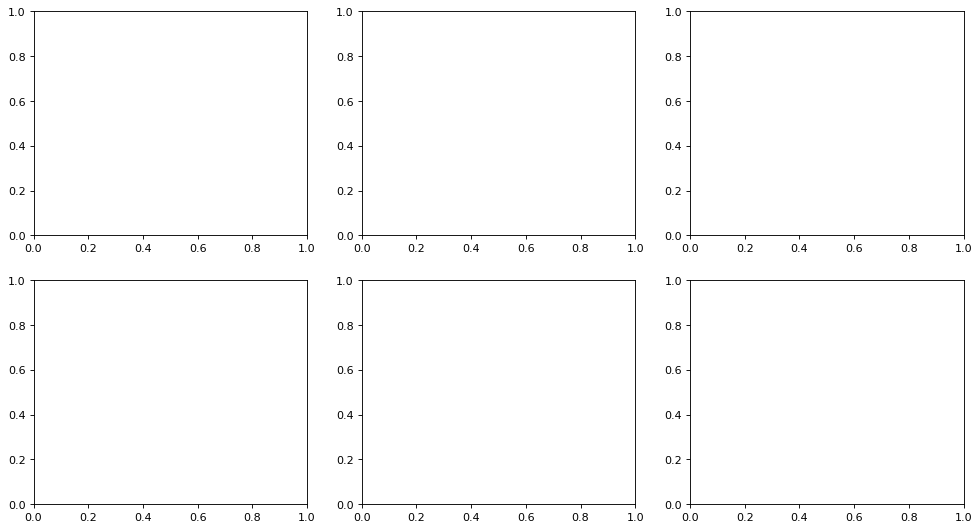

In [62]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (15, 8)) 

Where the first three cells are ax1, ax2, and ax3, respectively. The next three cells are ax4, ax5, and ax6, respectively. 

You may now use the assigned names instead of the indices as follows. We'll try to display the images in a 'T' shape

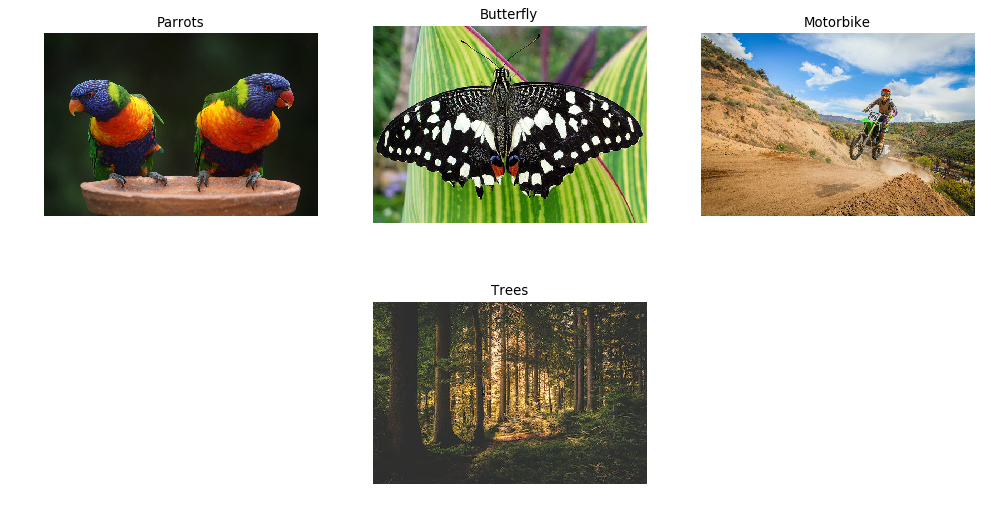

In [65]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (15, 8))

ax1.imshow(img_parrots)
ax1.set_title("Parrots")  # sets the title of the indexed subplot
ax1.axis('off')           # turns off the axis of the indexed subplot
    
ax2.imshow(img_butterfly)
ax2.set_title("Butterfly")
ax2.axis('off')  

ax3.imshow(img_motorbike)
ax3.set_title("Motorbike")
ax3.axis('off')  


ax5.imshow(img_trees)
ax5.set_title("Trees")
ax5.axis('off')

ax4.axis('off') # To hide the unused axes
ax6.axis('off');

## **Technique 2 (`subplot()` Method)**

The `subplot()` method in Matplotlib is used to create a single subplot within a figure. It allows you to specify the layout of the subplots in terms of rows, columns, and the index of the subplot you want to create.

`plt.subplot(nrows, ncols, index)`

- nrows: The number of rows in the grid
- ncols: The number of cols in the grid
- index: The index of the subplot you want to draw on. In this case, the subplots are numbered starting from 1 and proceed from left to right and top to bottom

> TIP: If the value of rows, columns, and index are all single digits, then you can write them as a single concatenated number. i.e `plt.subplot(rci)`

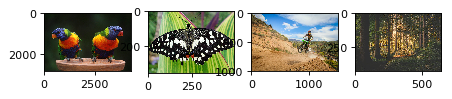

In [68]:
plt.subplot(1, 4, 1)
plt.imshow(img_parrots)

plt.subplot(1, 4, 2)
plt.imshow(img_butterfly)

plt.subplot(1, 4, 3)
plt.imshow(img_motorbike)

plt.subplot(1, 4, 4)
plt.imshow(img_trees);

Again, to fix the size of the canvas, we make use of the `figsize` parameter as follows:

`plt.figure(figsize = (width, height))`

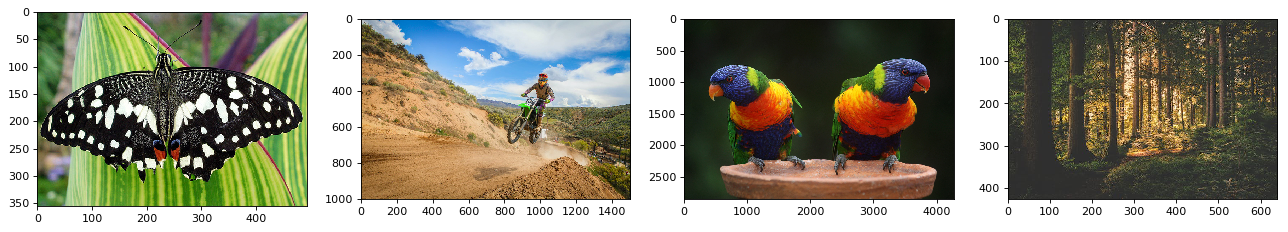

In [72]:
plt.figure(figsize = (20, 8)) # Again, we play around with the 'w' and 'h' until we're satisfied

plt.subplot(141)
plt.imshow(img_butterfly)

plt.subplot(142)
plt.imshow(img_motorbike)

plt.subplot(143)
plt.imshow(img_parrots)

plt.subplot(144)
plt.imshow(img_trees);

To make changes to any single axes, we first index it and then apply the changes. For example:

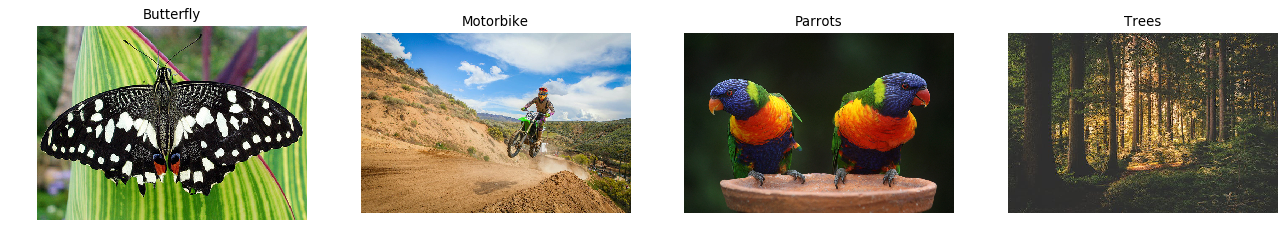

In [74]:
plt.figure(figsize = (20, 8))

plt.subplot(141)
plt.imshow(img_butterfly)
plt.title("Butterfly")
plt.axis('off')

plt.subplot(142)
plt.imshow(img_motorbike)
plt.title("Motorbike")
plt.axis('off')

plt.subplot(143)
plt.imshow(img_parrots)
plt.title("Parrots")
plt.axis('off')

plt.subplot(144)
plt.imshow(img_trees)
plt.title("Trees")
plt.axis('off');

Finally, it's worth noting that the `subplot()` method returns the specified axis, allowing us to store this information for future reference, as demonstrated below:

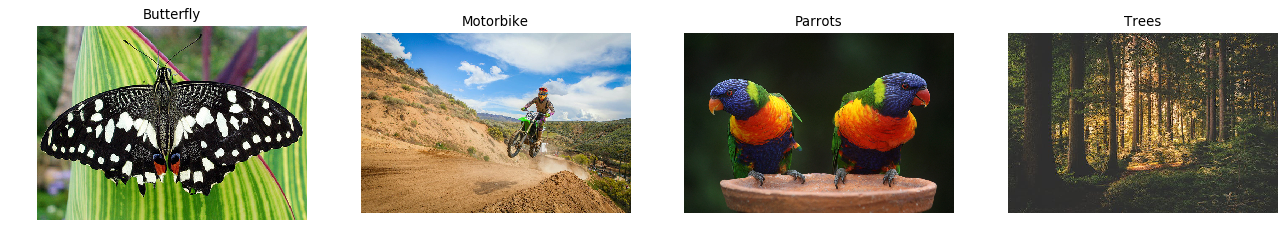

In [79]:
plt.figure(figsize = (20, 8))

ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(img_butterfly)
ax2.imshow(img_motorbike)
ax3.imshow(img_parrots)
ax4.imshow(img_trees)


ax1.set_title("Butterfly") # Notice `set_title` instead of `title`
ax2.set_title("Motorbike")
ax3.set_title("Parrots")
ax4.set_title("Trees")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off');

Take note of the subtle differences that arise when using an axis. One such change can be observed in the method call for setting the title. Most methods remain the same.

## **Technique 3 (`add_subplot()` Method)**

The `add_subplot()` method in Matplotlib is another way to create subplots within a figure. 

`plt.figure(figsize = (w, h))` is used to create a figure of the desired dimensions. This returns a new figure object which, in this case, must be stored for future reference. Once we have saved the figure object, we make use of the `add_subplot` function as follows:

`[figureObject].add_subplot(nrows, ncols, index)`

- nrows: The number of rows in the figure
- ncols: The number of columns in the figure
- index: The index of the desired subplot. Again, subplots are numbered starting from one and proceed from left to right and then top to bottom.

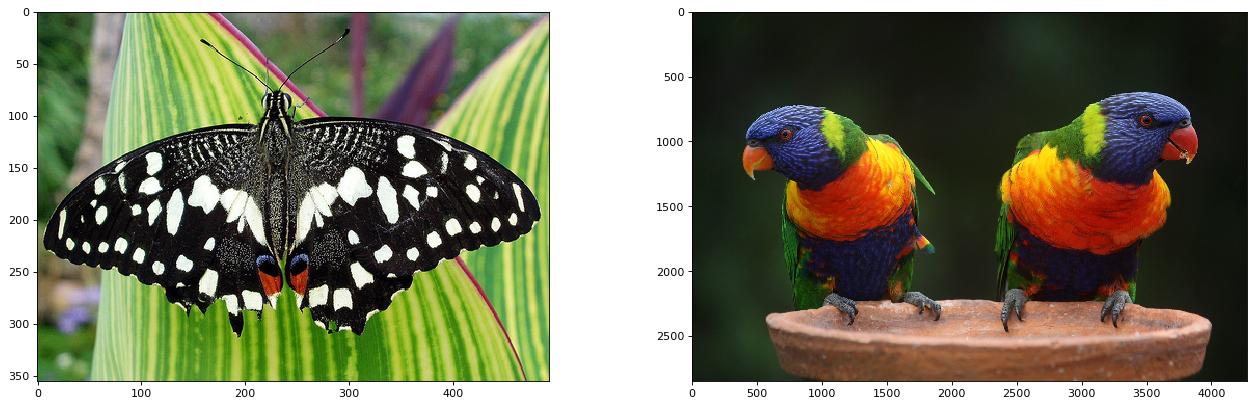

In [81]:
fig = plt.figure(figsize = (20, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_butterfly)

ax2 = fig.add_subplot(122) # Valid syntax as weel
ax2.imshow(img_parrots);

Everyting else remains the same in terms of modifying an individual axis.

## **IntelliSense in Jupyter**

Jupyter comes with its own "Intellisense" (general term for various code editing features including: code completion, parameter info, quick info, and member lists). To invoke it, simply press on to desired method and press `Shift + Tab` 

This enables you to access the method's definition, its parameter listing, and additional information, all without the need to exit your notebook.

> TIP: Press `TAB` to autocomplete variables, functions, file paths, etc.

> TIP: Press `SHIFT + TAB` to bring up the documentation. (Make sure the cursor is on the desired method or property)